In [1]:
import numpy as np
from mikefm_skill.model import ModelResult
from mikefm_skill.observation import PointObservation, TrackObservation

In [2]:
fn = '../tests/testdata/SW/HKZN_local_2017_DutchCoast.dfsu'
mr = ModelResult(fn)
mr.dfs

Dfsu2D
Number of elements: 958
Number of nodes: 570
Projection: LONG/LAT
Number of items: 15
Time: 23 steps with dt=10800.0s
      2017-10-27 00:00:00 -- 2017-10-29 18:00:00

In [3]:
o1 = PointObservation('../tests/testdata/SW/HKNA_Hm0.dfs0', item=0, x=4.2420, y=52.6887, name="HKNA")
o2 = PointObservation("../tests/testdata/SW/eur_Hm0.dfs0", item=0, x=3.2760, y=51.9990, name="EPL")

In [4]:
mr.add_observation(o1, item=0)
mr.add_observation(o2, item=0)
mr.observations

[PointObservation: HKNA, x=4.242, y=52.6887,
 PointObservation: EPL, x=3.276, y=51.999]

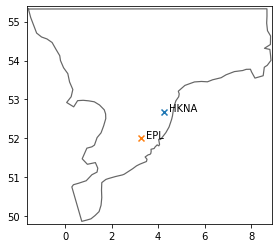

In [5]:
mr.plot_observation_positions()

In [6]:
cc = mr.extract()

In [7]:
cc.skill_report()

,bias,rmse,corr_coef,scatter_index
HKNA,-0.195266,0.352283,0.971082,0.088488
EPL,-0.075335,0.216357,0.972467,0.073902


<AxesSubplot:>

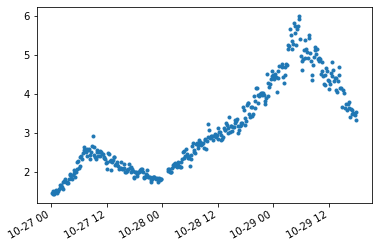

In [8]:
cc[0].df[cc[0].obs_name].plot(marker=".", linestyle="None")

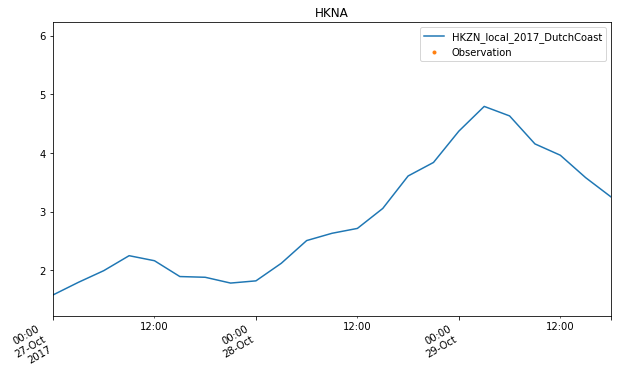

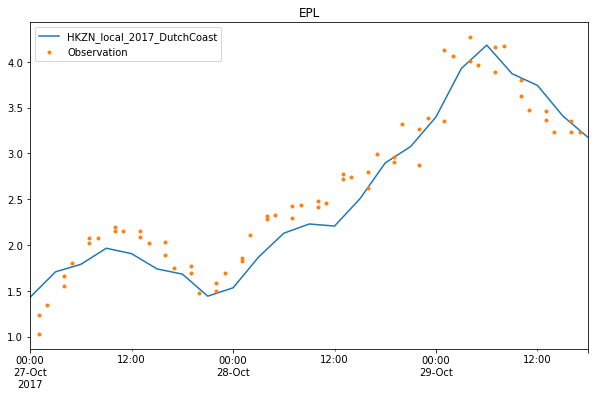

In [9]:
cc[0].plot_timeseries(figsize=(10,6))
cc[1].plot_timeseries(figsize=(10,6))

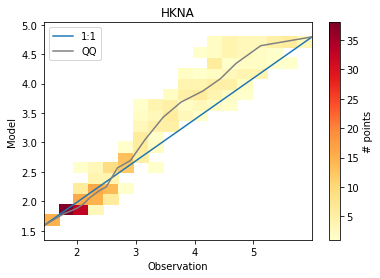

In [10]:
cc[0].scatter(binsize=0.25, cmap="YlOrRd")

In [11]:
o3 = TrackObservation("../tests/testdata/SW/Alti_c2_Dutch.dfs0", item=2, name="c2")

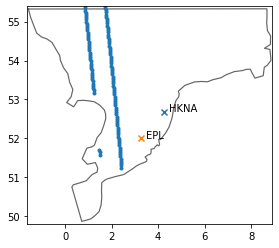

In [27]:
import matplotlib.pyplot as plt
mr.plot_observation_positions()
plt.plot(o3.x, o3.y,'.');